# Plotting and Visualization

- Plots in matplotlib resides within a `Figure` object. `fig=plt.figure()` creats a new figure. Then use `axes = fig.add_subplot()` to creat a axes.
- creat a grid of axes simultaneously: `fig,axis = plt.subplots(nrows,ncols,sharex=,sharey=)`
- set the title: `set_title()`
- settings of x-axis:
    - `set_xticks([])` choose points as ticks
    - `set_xticklabels([],rotation=,fontsize=)` assign names for each ticks
    - `set_xlabel()` assign name for x-axis
- Annotations: 
```python
ax.annotate('Bear Sterns Fails',
            xy=(date,spx.asof(date)+75),
            xytext=(date,spx.asof(date)+225),
            arrprops = dict(facecolor='black',headwidth=4,width=2,headlength=4),
            horizontalalignment='left',verticalalignment='top')
```
- Title: `ax.set_title('')`

- Importing `seaborn` modifies the default settings of `matplotlib`, making it more aesthetical. So import `seaborn` even you don't use it to plot

- Plotting with pandas
    - bar
        - `.plot.bar()` or `.plot.barh(ax=,stacked=False)`
        - use seaborn:`import seaborn as sns` -> `sys.barplot(x='tip_pct',y='day',hue='time',data=tips,orient='h')`
    - hist & density
        - `.plot.hist(bins=)`, `.plot.density()`
        - use seaborn: `sns.distplot(values,bins=)` draw the hist and density simultaneously
    - scatter or point
        - use seaborn: `sns.regplot('m1','unemp',data=trans_data)`;`sns.pairplot(trans_data,diag_kind='kde')
    - facet grid (when dealing with too many catagories)
        - use seaborn `sns.factorplot(x='day',y='tip_pct',hue='time',col='smoker',kind='bar',data=tips[tips['tip_pct']<1])`
        - use seaborn `sns.factorplot(x='day',y='tip_pct',row='time',col='smoker',kind='bar',data=tips[tips['tip_pct']<1])`
        

In [90]:
%matplotlib notebook
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


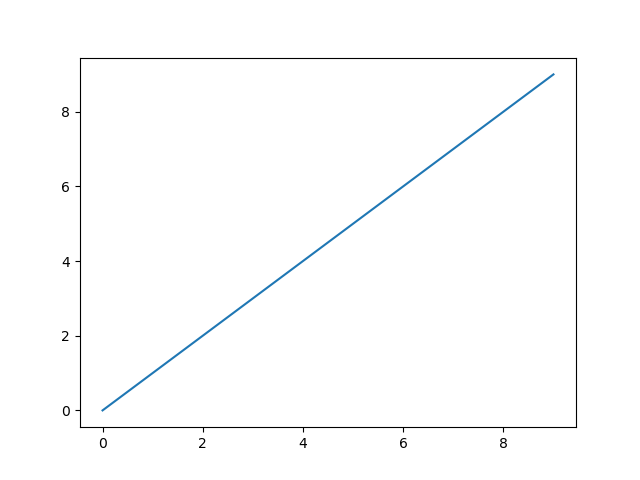

In [4]:
plt.plot(data)

<IPython.core.display.Javascript object>


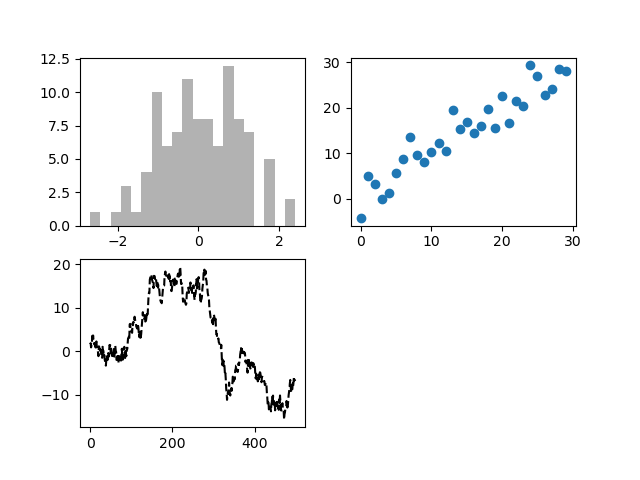

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(500).cumsum(),'k--')
ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

<IPython.core.display.Javascript object>


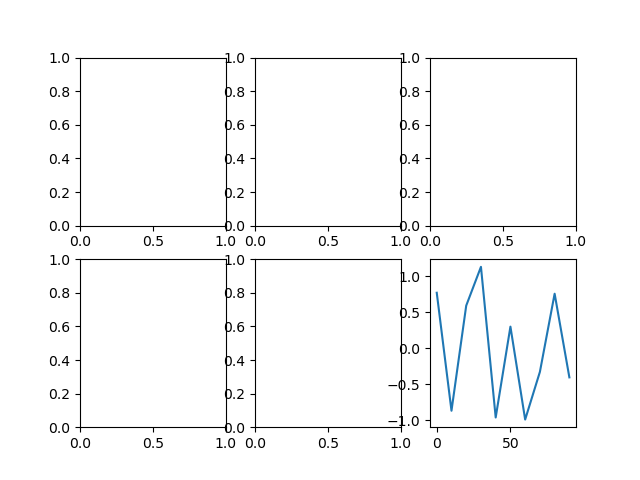

In [6]:
fig,axes = plt.subplots(2,3)

In [7]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<IPython.core.display.Javascript object>


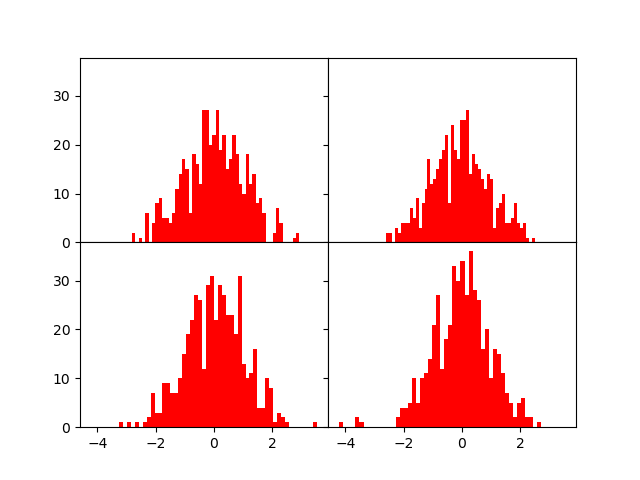

In [8]:
fig, axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i][j].hist(np.random.randn(500),bins=50,color='red')
plt.subplots_adjust(wspace=0,hspace=0)

<IPython.core.display.Javascript object>


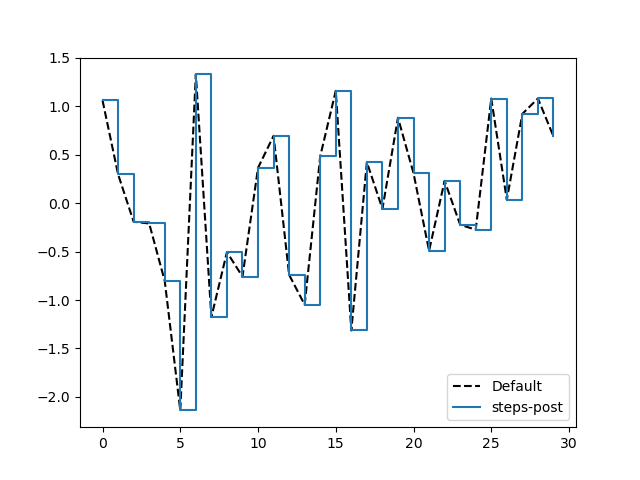

In [9]:
fig = plt.figure()
axes = fig.add_subplot(111)
data = np.random.randn(30)
axes.plot(data,'k--',label='Default')
axes.plot(data,drawstyle='steps-post',label='steps-post')
axes.legend()

<IPython.core.display.Javascript object>


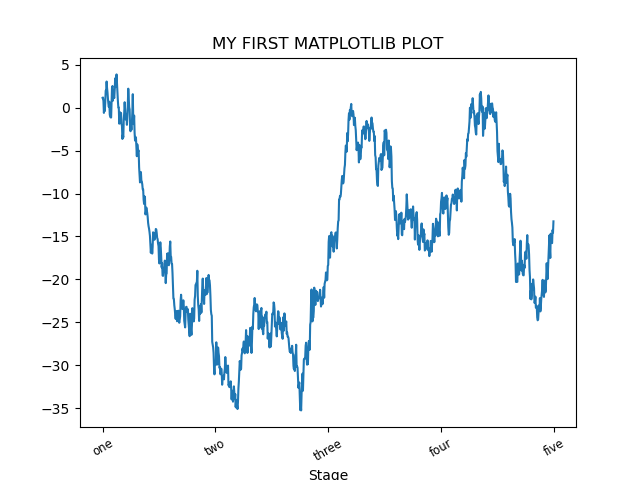

Text(0.5, 0, 'Stage')

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.random.randn(1000).cumsum())
ax.set_xticks([0,250,500,750,1000])
ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')
ax.set_title('my first matplotlib plot'.upper())
ax.set_xlabel('Stage')

<IPython.core.display.Javascript object>


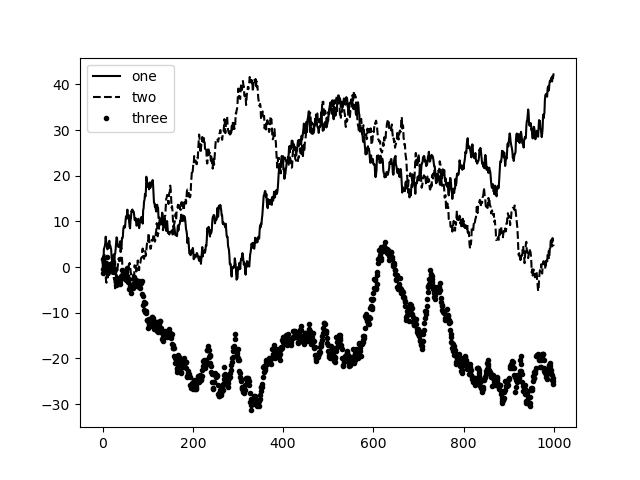

In [11]:
fig = plt.figure();ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(),'k',label='one')
ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')
ax.legend(loc='best')

In [12]:
ax.legend?

In [13]:
from datetime import datetime
data = pd.read_csv('spx.csv',index_col=0,parse_dates=True)
data

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25


In [14]:
spx = data['SPX']
spx

Date
1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64

In [15]:
crisis_data = [
    (datetime(2007,10,11),'peak of bull market'),
    (datetime(2008,3,12),'Bear Sterns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]

<IPython.core.display.Javascript object>


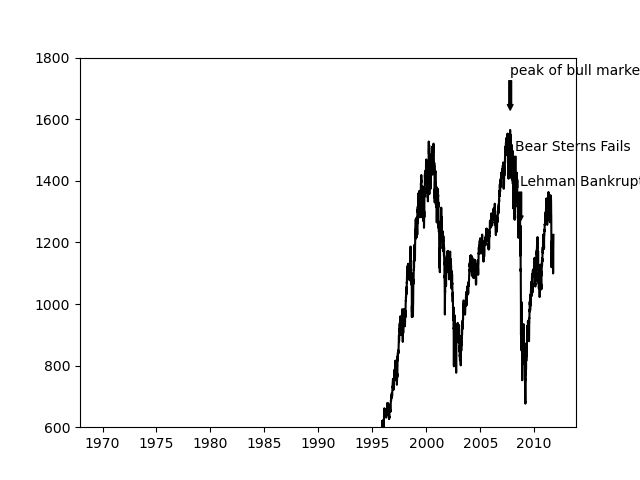

(600.0, 1800.0)

In [16]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(spx,'k-')

for date, label in crisis_data:
    ax.annotate(label,xy=(date,spx.asof(date)+75),
               xytext=(date,spx.asof(date)+225),
                      arrowprops=dict(facecolor='black',headwidth=4,width=2,headlength=4),
                      horizontalalignment='left',verticalalignment='top')

    
# ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])

In [17]:
spx.asof?


In [41]:
plt.rc('figure',figsize=(7,5))
font_options = {
    'family':'nomospace',
    'weight':'bold',
}
plt.rc('font',**font_options)

In [42]:
import seaborn

<IPython.core.display.Javascript object>


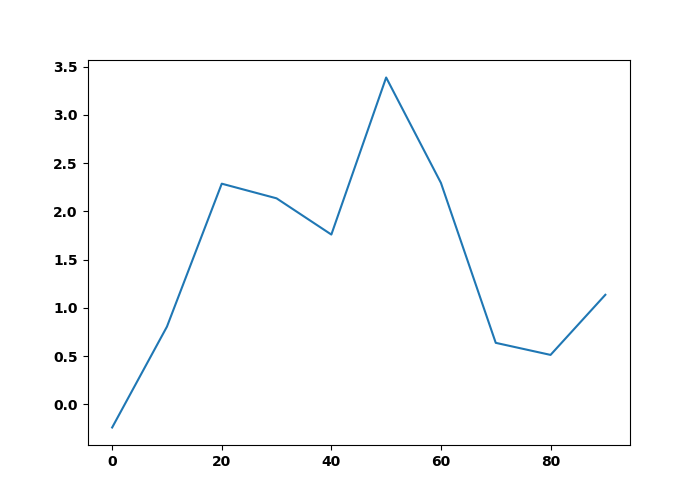

<AxesSubplot:>

In [46]:
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
fig = plt.figure()
ax = fig.add_subplot()
s.plot()

<IPython.core.display.Javascript object>


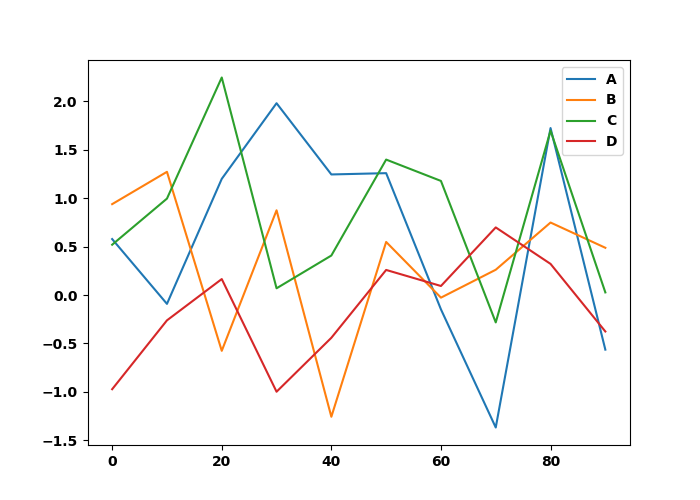

<AxesSubplot:>

In [47]:
df = pd.DataFrame(
    np.random.randn(10,4),
    columns=['A','B','C','D'],
    index = np.arange(0,100,10)
                 )
df.plot()

<IPython.core.display.Javascript object>


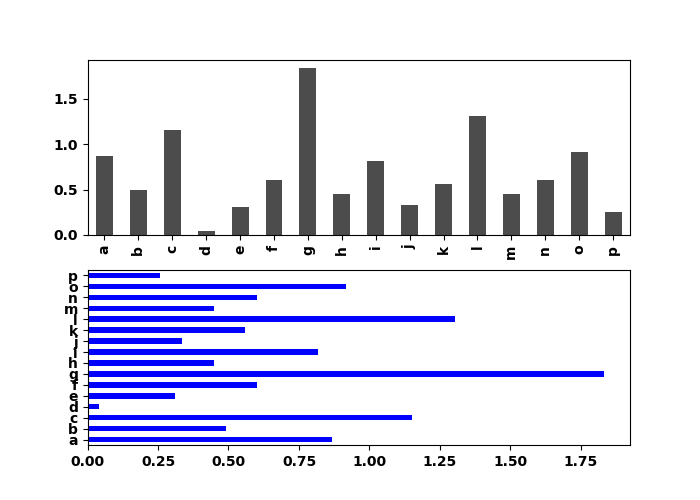

<AxesSubplot:>

In [51]:
fig,axes = plt.subplots(2,1)

data = pd.Series(np.abs(np.random.randn(16)),index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0],color='k',alpha=0.7)
data.plot.barh(ax=axes[1],color='blue',alpha=1)

<IPython.core.display.Javascript object>


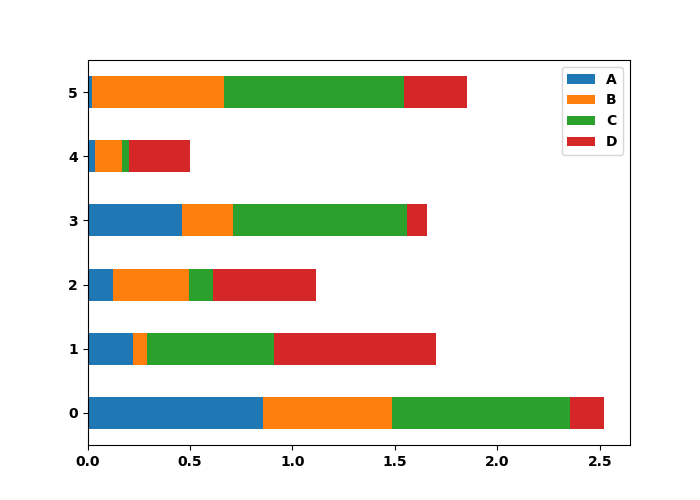

<AxesSubplot:>

In [57]:
df = pd.DataFrame(np.random.rand(6,4),columns=['A','B','C','D'],index=np.arange(6))
df.plot.barh(stacked=True)

In [58]:
tips = pd.read_csv('tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [59]:
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [61]:
party_counts = party_counts.loc[:,2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


<IPython.core.display.Javascript object>


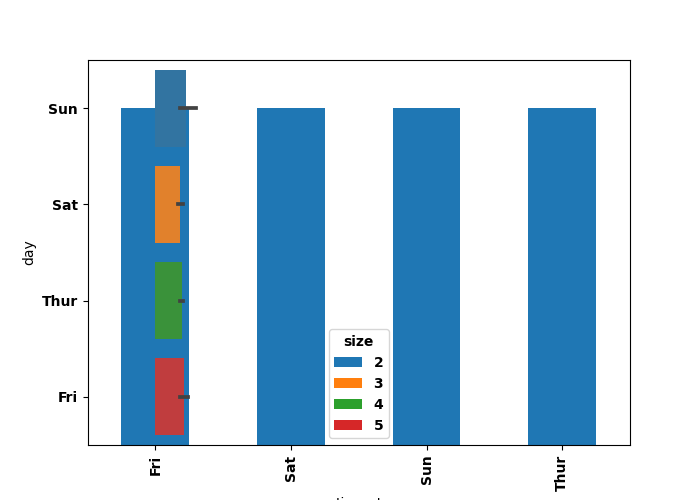

<AxesSubplot:xlabel='day'>

In [63]:
party_counts.plot.bar(stacked=True)

In [64]:
import seaborn as sns

In [65]:
tips['tip_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

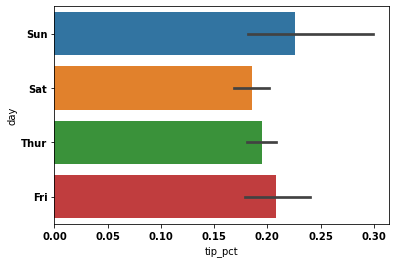

In [68]:
sns.barplot(x='tip_pct',y='day',data=tips,orient='h')

<AxesSubplot:ylabel='Frequency'>

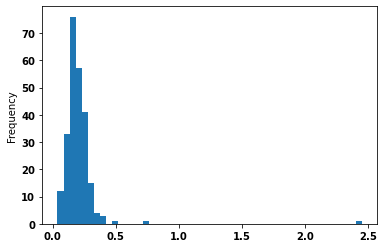

In [69]:
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

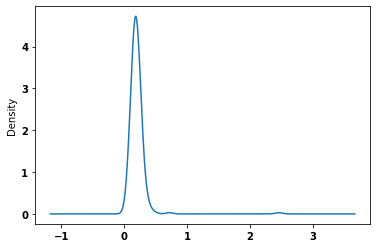

In [70]:
tips['tip_pct'].plot.density()

In [72]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values= pd.Series(np.concatenate([comp1,comp2]))
values

0      -0.684767
1       1.364066
2      -0.465169
3      -2.616102
4      -1.656438
         ...    
395    11.748323
396    12.081678
397     9.680824
398     9.481753
399     6.326311
Length: 400, dtype: float64

/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

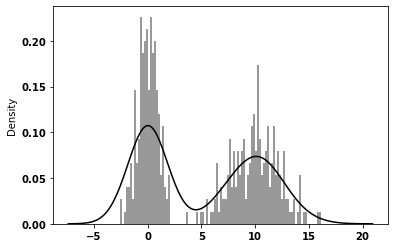

In [75]:
sns.distplot(values,bins=100,color='k')

In [76]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


In [78]:
trans_data = np.log(data).diff().dropna()
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

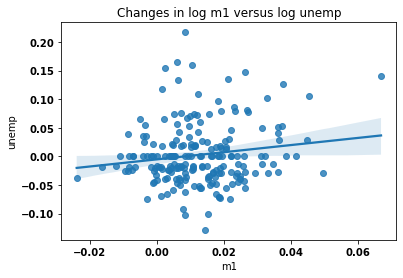

In [82]:
sns.regplot('m1','unemp',data=trans_data)
plt.title('Changes in log {} versus log {}'.format('m1','unemp'))

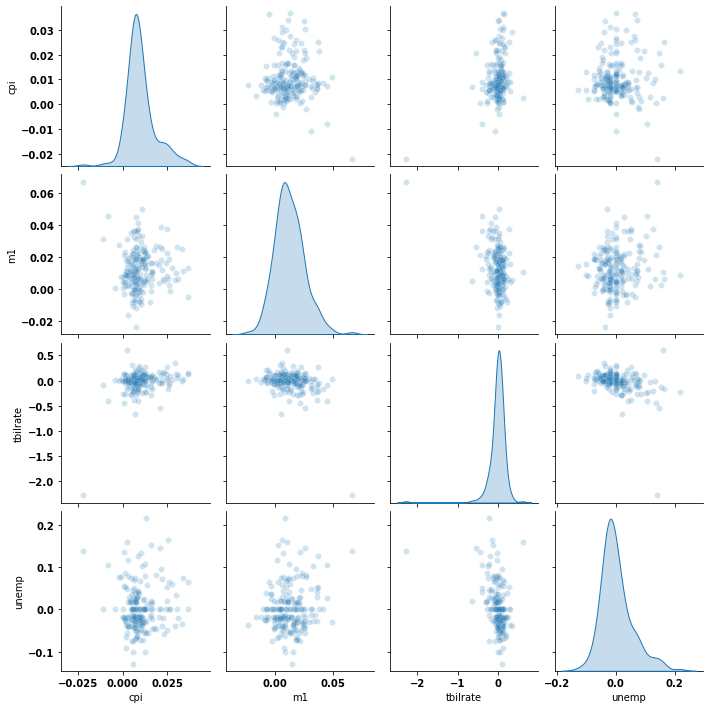

In [84]:
sns.pairplot(trans_data,diag_kind='kde',plot_kws={'alpha':0.2})

In [85]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


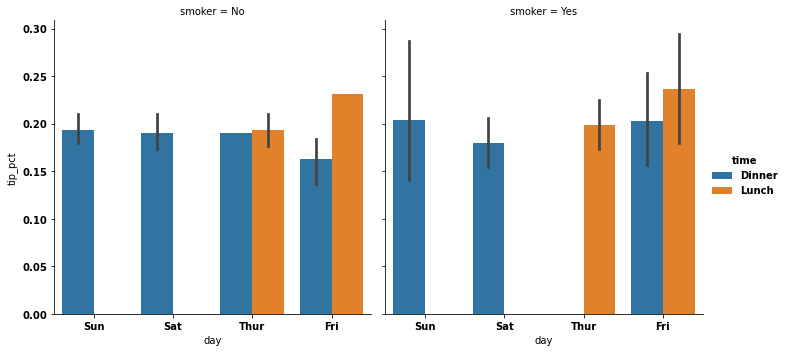

In [89]:
sns.factorplot(x='day',y='tip_pct',hue='time',col='smoker',kind='bar',data=tips[tips['tip_pct']<1])

/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


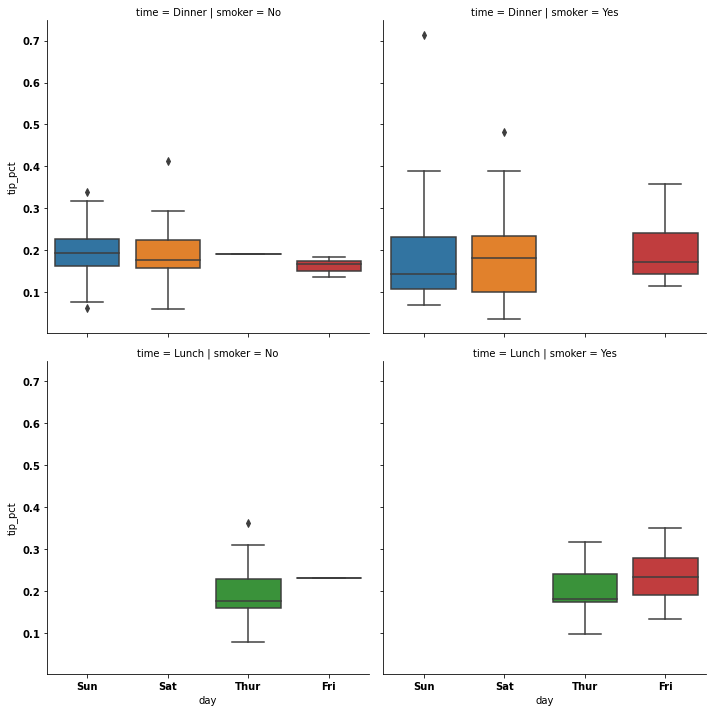

In [93]:
sns.factorplot(x='day',y='tip_pct',row='time',col='smoker',kind='box',data=tips[tips['tip_pct']<1])

/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


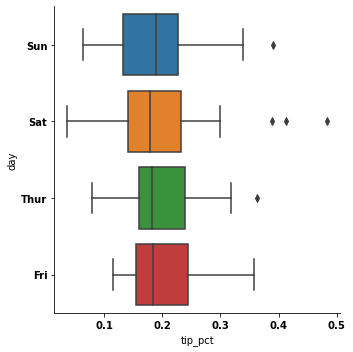

In [95]:
sns.factorplot(x='tip_pct',y='day',data=tips[tips['tip_pct']<0.5],kind='box')